## Part 1: Examine and understand your dataset 

In [114]:
# importing the required packages
from sklearn import datasets

import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [115]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

In [116]:
# downloading the faces dataset
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=60, resize=0.4)

In [117]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

## 1.1  Print out the description of the dataset using the variable faces.

In [118]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

### 1.2 Print out the total number of data points in this dataset.

In [119]:
print("Numer of data points: ",len(faces.data))

Numer of data points:  1348


### 1.3 Print out the number of classes, and the corresponding person name for each class. Print out 50 photos of Ariel Sharon and 50 photos of Hugo Chavez.

In [120]:
class_ids=np.unique(y)
print("Number of Classes: ",len(class_ids))
for i in range(len(class_ids)):
    print("Class: {} Name: {}".format(i,faces.target_names[i]))

Number of Classes:  8
Class: 0 Name: Ariel Sharon
Class: 1 Name: Colin Powell
Class: 2 Name: Donald Rumsfeld
Class: 3 Name: George W Bush
Class: 4 Name: Gerhard Schroeder
Class: 5 Name: Hugo Chavez
Class: 6 Name: Junichiro Koizumi
Class: 7 Name: Tony Blair


Pictures of Ariel Sharon


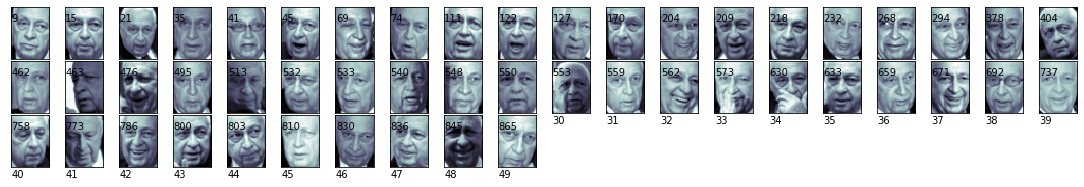

In [121]:
ariel_sharon = []
hugo_chavez = []
for i in range(len(X)):
    if y[i]== 0:
        if(len(ariel_sharon)<=50):
            ariel_sharon.append(i)
    elif y[i] == 5:
        if(len(hugo_chavez)<=50):
            hugo_chavez.append(i)
print("Pictures of Ariel Sharon")
display_faces(faces.images[ariel_sharon],ariel_sharon,50)

Pictures of Hugo Chavez


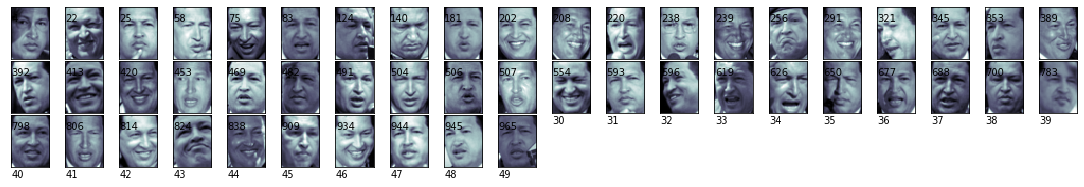

In [122]:
print("Pictures of Hugo Chavez")
display_faces(faces.images[hugo_chavez],hugo_chavez,50)

### 1.4 Understanding the problem

In supervised learning we train the algorithm or machine using data which is already labeled or tagged, but in supervised learning machine or algorithm  learns from previous patterns.

The give problem / dataset having images and tageted names, and we need to predict names based on images, here is it clear that we need to use supervised learning

These are the popular Supervised learning algorithms

    > Linear Regression
    > Logistic Regression
    > K-Nearest Neighbor
    > Support Vector Machines

### 1.5 create a single train-split with 20% of data for testing and the rest for training.

In [123]:
from sklearn.model_selection import train_test_split
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Part 2: Build Model 

### 2.1 Using  Logistic Regression as the classifier to examine what is working and what not working 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.8111111111111111


[[10  1  1  1  0  0  0  0]
 [ 1 40  0  4  0  0  0  1]
 [ 1  1 22  2  1  0  0  1]
 [ 0  3  3 90  1  1  0  1]
 [ 0  0  0  3 17  0  0  3]
 [ 0  0  0  2  2 11  0  1]
 [ 0  0  0  3  0  0 10  1]
 [ 0  1  2  8  1  0  0 19]]


From the above confusion matrix Logistic Regression algorithm predicting almost with 62% Accuracy.

### 2.1.a PCA for dimensionality reduction with 20 components to transform variable X to variable pca_X.

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_X = pca.fit_transform(X)

### 2.1.b Using Logistic Regression as the classifier to performance on recall, precision, accuracy, F-score with pca_X and 40% test data 

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.40, random_state=101)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)


print("Recall Score: {}".format(recall_score(y_test,y_pred,average='macro')))        
print("Precision Score: {}".format(precision_score(y_test,y_pred,average='macro')))        
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))  
print("F1 Score: {}".format(f1_score(y_test,y_pred,average='macro')))        

Recall Score: 0.4870658279496298
Precision Score: 0.6166527555131337
Accuracy Score: 0.6222222222222222
F1 Score: 0.5154248399297956


### 2.1.c Mean and standard deviation of the performance for each evaluation metrics

In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

shuffleSplit = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
lr = LogisticRegression()
lr.fit(X_train, y_train)

def get_recall_score(estimator,x,y):
    predicted = estimator.predict(x)
    return recall_score(y, predicted, average='macro')

def get_precision_score(estimator,x,y):
    predicted = estimator.predict(x)
    return precision_score(y, predicted,average='macro')

def get_accuracy_score(estimator,x,y):
    predicted = estimator.predict(x)
    return accuracy_score(y, predicted)

def get_f1_score(estimator,x,y):
    predicted = estimator.predict(x)
    return f1_score(y, predicted, average='macro')

recall_score = cross_val_score(lr, pca_X, y, cv=shuffleSplit, scoring=get_recall_score)
precision_score = cross_val_score(lr, pca_X, y, cv=shuffleSplit, scoring=get_precision_score)
accuracy_score = cross_val_score(lr, pca_X, y, cv=shuffleSplit,scoring = get_accuracy_score)
f1_score = cross_val_score(lr, pca_X, y, cv=shuffleSplit, scoring=get_f1_score)

print("Recall Score -  Mean : %.3f%%  |  Standard Deviation : %.3f%%" % (recall_score.mean()*100, recall_score.std()*100))
print("Precision Score - Mean : %.3f%%  |  Standard Deviation : %.3f%%" % (precision_score.mean()*100, precision_score.std()*100))
print("Accuracy Score - Mean : %.3f%%  |  Standard Deviation : %.3f%%" % (accuracy_score.mean()*100, accuracy_score.std()*100))
print("F1 Score Score- Mean : %.3f%%  |  Standard Deviation : %.3f%%" % (f1_score.mean()*100, f1_score.std()*100))

Recall Score -  Mean : 48.964%  |  Standard Deviation : 2.792%
Precision Score - Mean : 57.331%  |  Standard Deviation : 2.678%
Accuracy Score - Mean : 61.463%  |  Standard Deviation : 1.938%
F1 Score Score- Mean : 50.670%  |  Standard Deviation : 2.736%


### 2.1.d Showing the performance (recall, precision, accuracy, F-score) using K-fold cross-validation with k=10 folds

In [128]:
from sklearn.model_selection import KFold
kfold = KFold(10, False, 1)

accuracy = cross_val_score(lr, pca_X, y, cv=kfold)
precision = cross_val_score(lr, pca_X, y, cv=kfold, scoring='precision_macro')
recall = cross_val_score(lr, pca_X, y, cv=kfold, scoring='recall_macro')
f1_scores = cross_val_score(lr, pca_X, y, cv=kfold, scoring='f1_macro')

print("Accuracy: %.3f%% (%.3f%%)" % (accuracy.mean()*100, accuracy.std()*100))
print("Precision: %.3f%% (%.3f%%)" % (precision.mean()*100, precision.std()*100))
print("Recall: %.3f%% (%.3f%%)" % (recall.mean()*100, recall.std()*100))
print("F1 Score: %.3f%% (%.3f%%)" % (f1_scores.mean()*100, f1_scores.std()*100))

Accuracy: 61.655% (4.949%)
Precision: 57.853% (5.577%)
Recall: 49.333% (4.413%)
F1 Score: 50.680% (4.542%)


### 2.1.e Recall, Precision, Accuracy and F-score from step(c),step(d) and step(b)

<table class='table'>
    <thead> 
        <tr> 
            <th>Metric</th> 
            <th>step (c)</th> 
            <th>step (d)</th> 
            <th>step (b)</th> 
        </tr> 
    </thead> 
    <tbody> 
        <tr> 
            <th scope='row'>Accuracy</th> 
            <td>61.46</td> 
            <td>61.72</td> 
            <td>62.22</td> 
        </tr> 
        <tr> 
            <th scope='row'>Precision</th> 
            <td>57.20</td>
            <td>57.88</td> 
            <td>61.65</td>
        </tr> 
        <tr> 
            <th scope='row'>Recall</th>
            <td>49.02</td>
            <td>49.35</td> 
            <td>48.70</td> 
        </tr> 
        <tr> 
            <th scope='row'>F1 Score</th>
            <td>50.71</td>
            <td>50.71</td> 
            <td>51.60</td> 
        </tr>
    </tbody>
</table>

After comparing the step(c),step(d) and step(b), the performance almost similar in each step, and also accracy is low, we have to improve accuracy

### 2.2 

### single function to help accelerating the analyses

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

### 2.2.a

In [ ]:
from sklearn import svm
from sklearn.metrics import make_scorer

ls = svm.LinearSVC(loss='squared_hinge')
ls_acc = ml_algorithm_screening_face(X,y,ls,"svm_model",scoring_metrics='precision_macro',pca_dim=20,n_runs=10)
print("Accuracy: %.3f%% (%.3f%%)" % (ls_acc.mean()*100, ls_acc.std()*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.0s remaining:    7.3s


Accuracy: 24.737% (3.050%)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.3s finished


In [ ]:
acc_data = []
for i in range(10,160,10):
    ls_acc = ml_algorithm_screening_face(X,y,ls,"svm_model",scoring_metrics='precision_macro',pca_dim=i,n_runs=10)
    print("Accuracy: %.3f%% (%.3f%%)" % (ls_acc.mean()*100, ls_acc.std()*100))
    acc_data.append(ls_acc)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 17.585% (5.001%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    8.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 25.027% (3.033%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.9s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 29.713% (6.507%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   14.9s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 40.605% (6.304%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   23.0s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 39.229% (6.070%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   24.5s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 42.202% (5.600%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   37.3s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 43.999% (4.400%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   34.3s remaining:   22.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   38.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 47.433% (7.558%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   46.4s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   51.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 49.829% (4.317%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   47.5s remaining:   31.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 48.177% (4.906%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   59.0s remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 49.921% (7.547%)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.2min remaining:   49.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished


Accuracy: 50.849% (6.303%)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(1, figsize=(14, 6))
aix = fig.add_subplot(111)
boxplot = aix.boxplot(acc_data)